# MAIN

In [1]:
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

sys.path.insert(0, './modelling')
sys.path.insert(0, './configuration')

from configuration.Feature_Indices import ensemble_index, logit_index
from modelling.model import Model, TransferModel
from modelling.explanation import Shap
from modelling.prediction import Prediction
from modelling.functions import get_key_values_where_index_is_in_both_dataframes
from modelling.ml import ML


import warnings
warnings.filterwarnings(action="ignore")
plt.style.use({'figure.facecolor':'white'})
shap.initjs()

In [2]:
# Set configuration. Without it, nothing will work.
ML.set_configuration(path_to_config_file='./configuration/config.ini')

### I. ORIGINAL MODEL

##### A. Create instances of class "Model"

In [3]:
random_forest_model = Model()       # For: RandomForest
logit_model = Model()               # For: LogisticRegression
xgb_model = Model()                 # For: XGBClassifier

##### B. Load data to train models

In [4]:
random_forest_model.load_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
logit_model.load_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
xgb_model.load_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')

##### C. Set key, target and features
###### Note: The Original Model needs a SECOND KEY because the first key ('orig_key_1') is not unique in the training model data set. For the explanation object, the combination of "key" and "second_key" makes a row unique and thus allows to index the dataframe.

In [5]:
random_forest_model.set_key_target_features(key='orig_key_1',target='orig_target', features=ensemble_index, features_excluded_in_training=['orig_key_1', 'orig_key_3', 'orig_key_2'], second_key='orig_key_2')
logit_model.set_key_target_features(key='orig_key_1',target='orig_target', features=logit_index, features_excluded_in_training=['orig_key_1', 'orig_key_3', 'orig_key_2'], second_key='orig_key_2')
xgb_model.set_key_target_features(key='orig_key_1',target='orig_target', features=ensemble_index, features_excluded_in_training=['orig_key_1', 'orig_key_3', 'orig_key_2'], second_key='orig_key_2')

##### D. Train-Test-split of dataset
###### Note: Split along group "orig_key_3" for cross validation in order to avoid data leakage

In [6]:
random_forest_model.train_test_split_dataframe(group='orig_key_3')
logit_model.train_test_split_dataframe(group='orig_key_3')
xgb_model.train_test_split_dataframe(group='orig_key_3')

##### E. Select estimators and hyperparameters (reference in the config.ini)

In [7]:
est1 = RandomForestClassifier()
params_name1 = 'rfc'
random_forest_model.set_estimator_and_parameters(unfitted_estimator=est1, hyper_params_dict_name_in_config=params_name1)

In [8]:
est2 = LogisticRegression()
params_name2 = 'logit'
logit_model.set_estimator_and_parameters(unfitted_estimator=est2, hyper_params_dict_name_in_config=params_name2)

In [9]:
est3 = XGBClassifier()
params_name3 = 'xgb'
xgb_model.set_estimator_and_parameters(unfitted_estimator=est3, hyper_params_dict_name_in_config=params_name3)

##### F. Train model and cross validate

In [10]:
random_forest_model.train_model_and_cross_validate()
logit_model.train_model_and_cross_validate()
xgb_model.train_model_and_cross_validate()

###### Note: Estimators can be saved, if desired:

In [11]:
random_forest_model.save_fitted_estimator(config_section='Original.Model.Models', config_name='rfc')
logit_model.save_fitted_estimator(config_section='Original.Model.Models', config_name='logit')
xgb_model.save_fitted_estimator(config_section='Original.Model.Models', config_name='xgb')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Models/rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Models/logit.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Models/xgb.joblib !


###### Note: Also, dataframes could be saved if desired (i.e. if they were altered):

In [12]:
random_forest_model.save_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
logit_model.save_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
xgb_model.save_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Training/orig_learn_data_preprocessed.zip !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Training/orig_learn_data_preprocessed.zip !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Training/orig_learn_data_preprocessed.zip !


##### G. Get training results for train-set and cv-sets (cv-train and cv-test -> part of train set)

In [13]:
random_forest_model.get_cv_results()

,0
mean_fit_time,0.762211
std_fit_time,0.021018
mean_score_time,0.030591
std_score_time,0.001032
param_bootstrap,True
param_ccp_alpha,0.0
param_class_weight,None
param_criterion,gini
param_max_depth,None
param_max_features,log2


In [14]:
logit_model.get_cv_results()

,0
mean_fit_time,0.164396
std_fit_time,0.007328
mean_score_time,0.007199
std_score_time,0.000399
param_estimator__C,0.1
param_estimator__class_weight,None
param_estimator__dual,False
param_estimator__fit_intercept,True
param_estimator__intercept_scaling,1
param_estimator__l1_ratio,None


In [15]:
xgb_model.get_cv_results()

,0
mean_fit_time,0.7046
std_fit_time,0.190522
mean_score_time,0.011199
std_score_time,0.001167
param_base_score,None
param_booster,None
param_colsample_bylevel,None
param_colsample_bynode,None
param_colsample_bytree,None
param_gamma,None


##### H. Get roc_auc for test set (to validate chosen model)

In [16]:
random_forest_model.get_test_set_roc_auc_score()

0.9356802013950039

In [17]:
logit_model.get_test_set_roc_auc_score()

0.9337612035851472

In [18]:
xgb_model.get_test_set_roc_auc_score()

0.9349944584110507

### II. FEATURE CONTRIBUTION / SHAP VALUES

##### A. First, create an ExplanationInput-object from the respective (original) model (from above).

In [19]:
random_forest_model.generate_explanation_input()
xgb_model.generate_explanation_input()

###### You could save the explanation_input_object if desired

In [20]:
random_forest_model.save_explanation_input_object(config_section='Original.Model.Explanation', config_name='explanation_input_object', model_type='RFC')
xgb_model.save_explanation_input_object(config_section='Original.Model.Explanation', config_name='explanation_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Explanation/explanation_input_object_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Explanation/explanation_input_object_xgb.joblib !


##### B. The explanation_input_object is the input to a new instance of class Shap (a subclass of class Explanation)

In [21]:
# Load the explanation_input_object before if it is not in memory and if it was saved before
if not random_forest_model.explanation_input_object:
    random_forest_model.load_explanation_input_object(config_section='Original.Model.Training', config_name='explanation_input', model_type='ensemble')
if not xgb_model.explanation_input_object:
    xgb_model.load_explanation_input_object(config_section='Original.Model.Training', config_name='explanation_input', model_type='ensemble')

In [22]:
expl_random_forest = Shap(explanation_input=random_forest_model.explanation_input_object)

In [23]:
expl_xgb = Shap(explanation_input=xgb_model.explanation_input_object)

##### C. Create the required SHAP-objects (explainer and explanation objects).
###### CAUTION: This might take a while depending on your setup and dataset. With the provided dataset, this takes around 4 min on my (old) machine.

In [24]:
expl_random_forest.create_shap_objects()

100%|===================| 19578/19608 [02:52<00:00]        

In [25]:
expl_xgb.create_shap_objects()

100%|===================| 9908/9936 [00:53<00:00]        

##### D. Calculate the global explanation object

In [26]:
expl_random_forest.calc_global_explanation()

In [27]:
expl_xgb.calc_global_explanation()

##### E. Now, feature contributions can be plotted

###### GLOBAL PLOTS (Aggregates for the entire dataset)

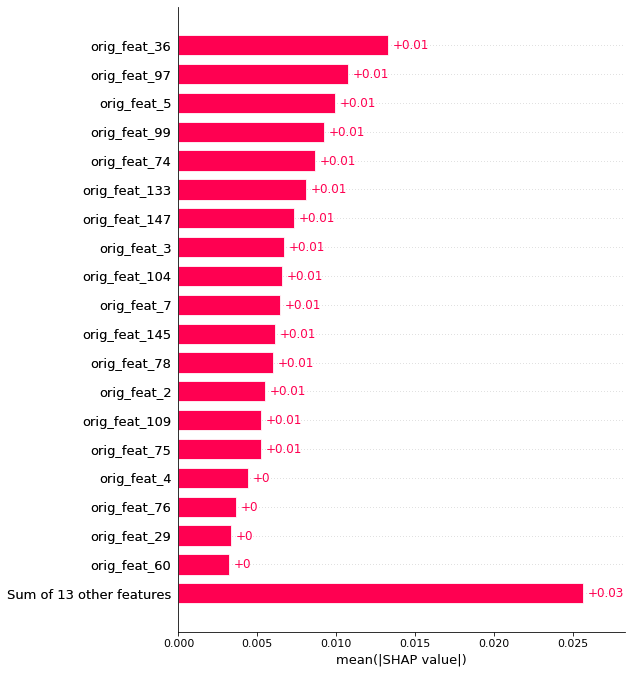

In [28]:
expl_random_forest.plot_global_bars(num_feat_shown=20)

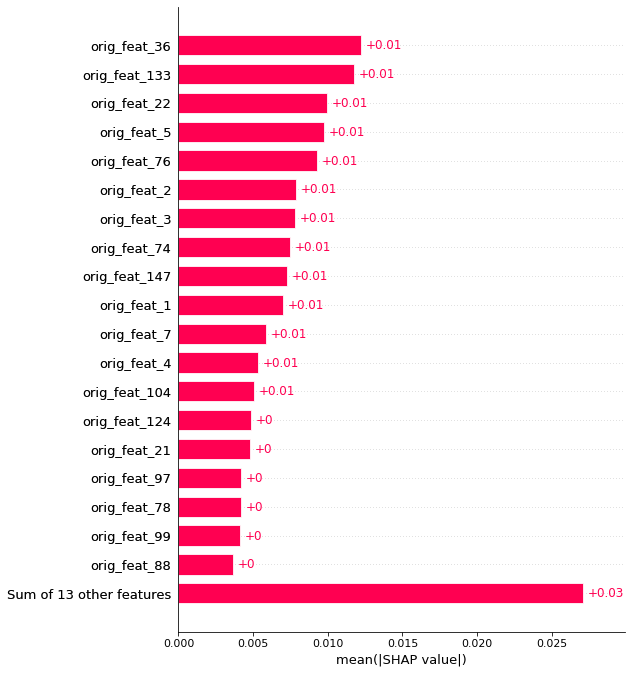

In [29]:
expl_xgb.plot_global_bars(num_feat_shown=20)

###### Note: The global heatmap plot is computationally expensive and takes quite some time if the data set is big. Consider omitting it:

In [30]:
# expl_random_forest.plot_global_heatmap(num_feat_shown=20)

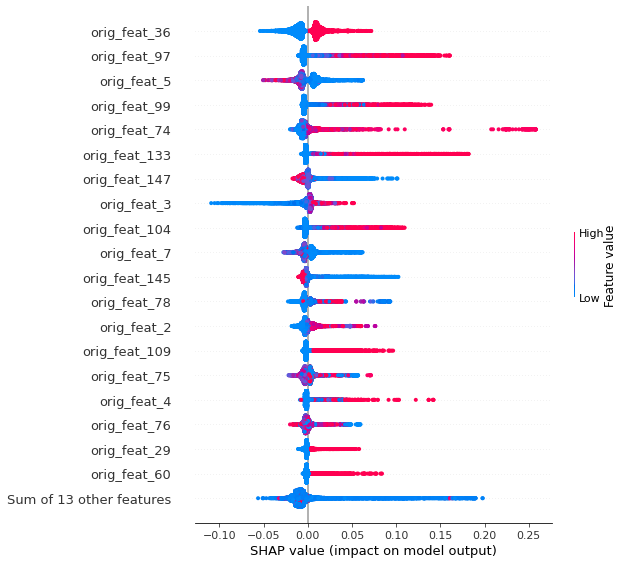

In [31]:
expl_random_forest.plot_global_beeswarm(num_feat_shown=20)

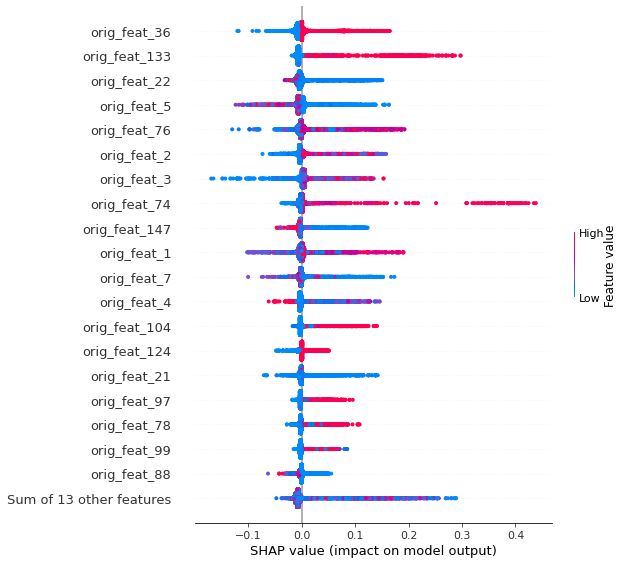

In [32]:
expl_xgb.plot_global_beeswarm(num_feat_shown=20)

###### LOCAL PLOTS (For individual data points)

###### Note: Choose a data row. The data row and their key values (key: 'orig_key_1') must be in the chosen shap_data_for_explanation data set (see section [Model.Explanation] in the config.ini). For the Original Model Shaps, we also need the second_key_val (here 'orig_key_2') as the 'orig_key_1' alone is not unique in that data set.

In [33]:
# RandomForest
key_list_1 = get_key_values_where_index_is_in_both_dataframes(df_one=random_forest_model.X ,df_two=expl_random_forest.shap_explanation_data, key_in_df_one='orig_key_1', second_key_in_df_one='orig_key_2')
kv1, skv1 = key_list_1[0]

# XGB
key_list_3 = get_key_values_where_index_is_in_both_dataframes(df_one=xgb_model.X ,df_two=expl_xgb.shap_explanation_data, key_in_df_one='orig_key_1', second_key_in_df_one='orig_key_2')
kv3, skv3 = key_list_3[0]

###### Note: Check whether the chosen single data row is in the respective shap explanation data sets. shap_explanation_data contains the reduced data set (reduced to size "max_num_explanation_data_rows" in the config.ini). shap_explanation_data_all contains the entire data set chosen (like "train" or "test" or "monthly")

In [34]:
expl_random_forest.get_info_about_key_vals(key_value=kv1, second_key_value=skv1)

INFO: The orig_key_1 = k1_val93 with orig_key_2 = 201012 IS in the shap_explanation_data (reduced data set) and IS in the shap_explanation_data_all !


In [35]:
expl_xgb.get_info_about_key_vals(key_value=kv3, second_key_value=skv3)

INFO: The orig_key_1 = k1_val129 with orig_key_2 = 201708 IS in the shap_explanation_data (reduced data set) and IS in the shap_explanation_data_all !


###### The local_shap_values_from_method (calculated with the data in: shap_explanation_data_all (the entire data set)):

In [36]:
expl_random_forest.get_local_shap_values_from_method(key_value=kv1, second_key_value=skv1)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
1,-0.002858,0.015389,-0.003849,-0.011773,-0.009361,-0.004314,0.01092,-0.001671,-0.005539,-0.001598,...,0.003684,-0.003179,-0.001037,0.003852,0.002302,-0.000244,-0.000195,-0.000409,-0.004515,-0.000045


In [37]:
expl_xgb.get_local_shap_values_from_method(key_value=kv3, second_key_value=skv3)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
4,-0.007764,-0.013342,-0.00328,0.003702,0.004609,-0.00256,0.00015,-0.002834,-0.000545,-0.002288,...,-0.000502,-0.001501,0.001207,-0.000344,0.000138,-0.000023,0.000037,-0.000849,0.000002,-0.000399


###### The local_shap_values_from_global, drawn from the global_shap_explanation object based on the shap_explanation_data (the reduced data set):

In [38]:
expl_random_forest.get_local_shap_values_from_global(key_value=kv1, second_key_value=skv1)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
1,-0.002858,0.015389,-0.003849,-0.011773,-0.009361,-0.004314,0.01092,-0.001671,-0.005539,-0.001598,...,0.003684,-0.003179,-0.001037,0.003852,0.002302,-0.000244,-0.000195,-0.000409,-0.004515,-0.000045


In [39]:
expl_xgb.get_local_shap_values_from_global(key_value=kv3, second_key_value=skv3)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
4,-0.007764,-0.013342,-0.00328,0.003702,0.004609,-0.00256,0.00015,-0.002834,-0.000545,-0.002288,...,-0.000502,-0.001501,0.001207,-0.000344,0.000138,-0.000023,0.000037,-0.000849,0.000002,-0.000399


###### Note: There is an issue with the local shap values as there is a difference between local shap values coming from global and local shap values coming from the method. With the "compare_local_shap_from_global_with_local_shap_from_method()-method", the difference can be shown. The error should be corrected in newer versions of shap.

In [40]:
expl_random_forest.compare_local_shap_from_global_with_local_shap_from_method(key_value=kv1, second_key_value=skv1)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,1
orig_feat_22,0.023312


In [41]:
expl_xgb.compare_local_shap_from_global_with_local_shap_from_method(key_value=kv3, second_key_value=skv3)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,4
orig_feat_75,0.009868


###### PLOTS:

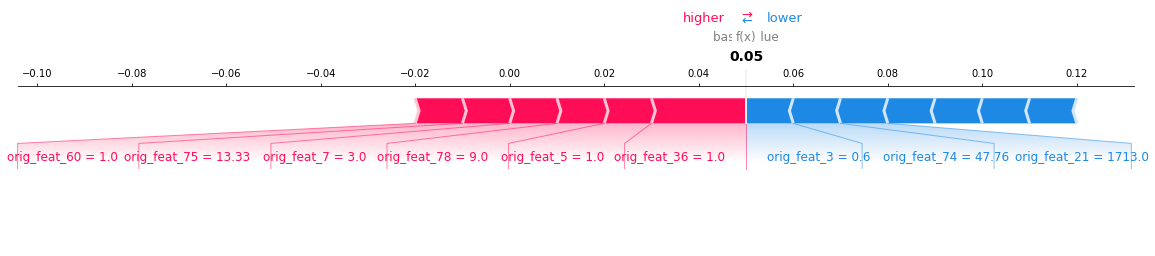

In [42]:
expl_random_forest.plot_local_force(key_value=kv1, second_key_value=skv1)

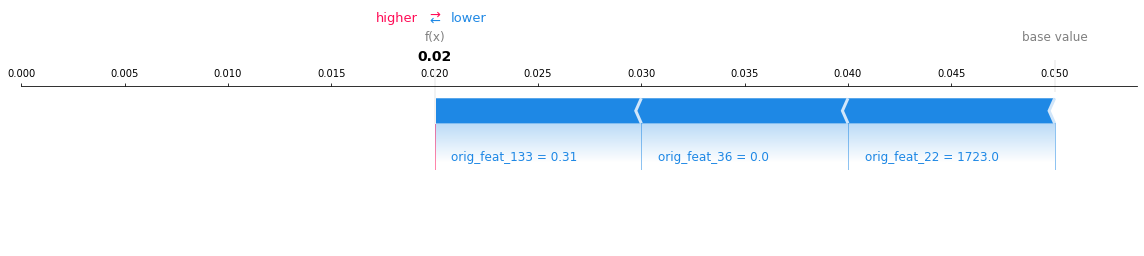

In [43]:
expl_xgb.plot_local_force(key_value=kv3, second_key_value=skv3)

###### Note: The local bar plot is calculated on the basis of the global shap values. The values are NOT correct and the error is shown above with the "compare_local_shap_from_global_with_local_shap_from_method()"-method.

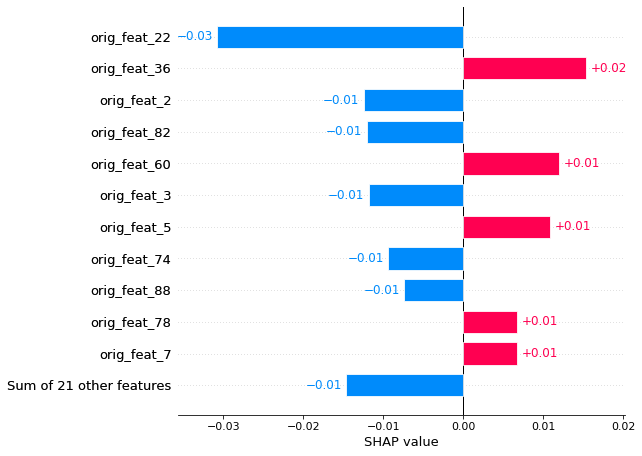

In [44]:
expl_random_forest.plot_local_bars_from_global(key_value=kv1, second_key_value=skv1)

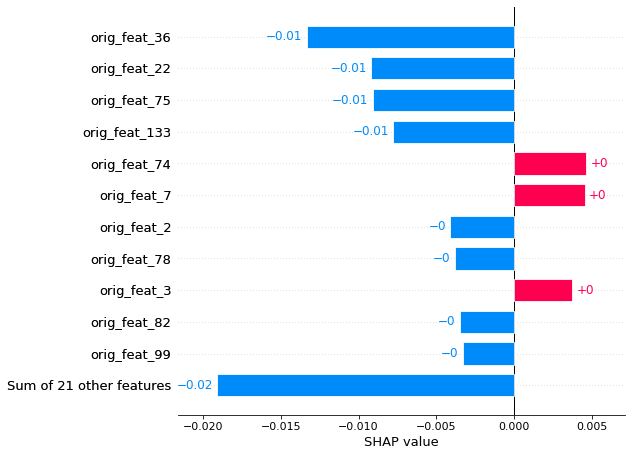

In [45]:
expl_xgb.plot_local_bars_from_global(key_value=kv3, second_key_value=skv3)

###### Note: The local waterfall plot is calculated on the basis of the global shap values. The values are NOT correct and the error is shown above with the "compare_local_shap_from_global_with_local_shap_from_method()"-method.

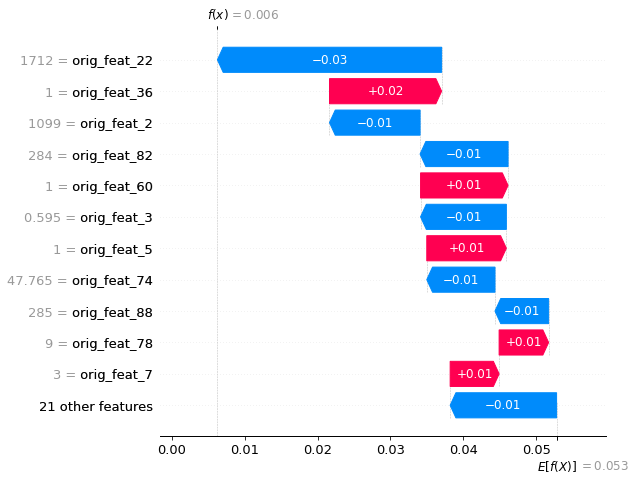

In [46]:
expl_random_forest.plot_local_waterfall_from_global(key_value=kv1, second_key_value=skv1)

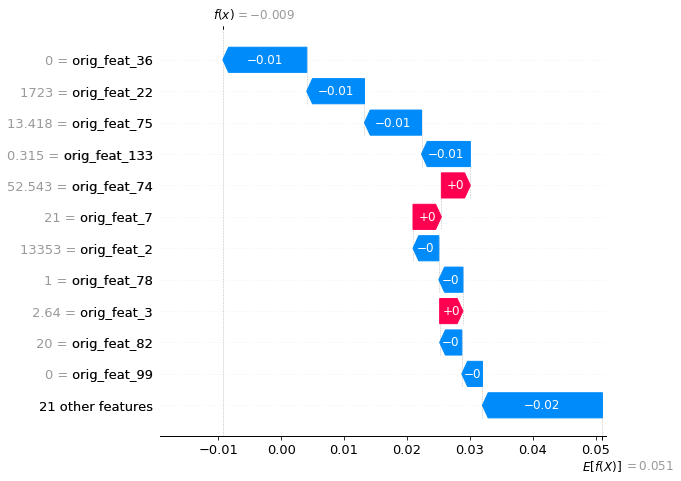

In [47]:
expl_xgb.plot_local_waterfall_from_global(key_value=kv3, second_key_value=skv3)

## III. MAKE PREDICTIONS WITH ORIGINAL MODEL

##### A. Generate prediction input(a namedtuple: PredictionInput) as input to an "Prediction"-instance

In [48]:
random_forest_model.generate_prediction_input()
logit_model.generate_prediction_input()
xgb_model.generate_prediction_input()

###### You can also save the prediction_input_objects for later usage:

In [49]:
random_forest_model.save_prediction_input_object(config_section='Original.Model.Monthly', config_name='prediction_input_object', model_type='RFC')
logit_model.save_prediction_input_object(config_section='Original.Model.Monthly', config_name='prediction_input_object', model_type='Logit')
xgb_model.save_prediction_input_object(config_section='Original.Model.Monthly', config_name='prediction_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/prediction_input_object_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/prediction_input_object_logit.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/prediction_input_object_xgb.joblib !


##### B. Pass prediction_input_objects to new Prediction-instances for required data and settings:

In [50]:
pred_random_forest = Prediction(random_forest_model.prediction_input_object)

In [51]:
pred_logit = Prediction(logit_model.prediction_input_object)

In [52]:
pred_xgb = Prediction(xgb_model.prediction_input_object)

##### C. Load data

In [53]:
# EITHER:
pred_random_forest.load_prediction_dataframe(config_section='Original.Model.Monthly', config_name='data_for_prediction')
pred_logit.load_prediction_dataframe(config_section='Original.Model.Monthly', config_name='data_for_prediction')
pred_xgb.load_prediction_dataframe(config_section='Original.Model.Monthly', config_name='data_for_prediction')

##### D. Load quantile portfolio: One instance is sufficient as the quantile_portfolio is saved at the class level:

In [54]:
pred_random_forest.load_quantile_portfolio(config_section='Original.Model.Monthly', config_name='quantile_portfolio')

##### E. Get the keys (for 'orig_key_1') for the quantile portfolio:

In [55]:
pred_random_forest.set_quantile_keys()
pred_logit.set_quantile_keys()
pred_xgb.set_quantile_keys()

##### F. Finally: Make predictions

In [56]:
pred_random_forest.predict_probas()
pred_logit.predict_probas()
pred_xgb.predict_probas()

In [57]:
pred_random_forest.calculate_quantiles()
pred_logit.calculate_quantiles()
pred_xgb.calculate_quantiles()

In [58]:
###### Get a sample key ('orig_key_1' i.e a client id) for which to get an individual prediction (predict_proba)

In [59]:
orig_key_1_val = pred_random_forest.instance_result_dataframe.orig_key_1[0]
orig_key_1_val

'k1_val29854'

###### proba for this client with the respective data to be a fraud case:

In [60]:
pred_random_forest.get_pred_proba_for_key(key_value=orig_key_1_val)

0.00032967032967032967

In [61]:
pred_logit.get_pred_proba_for_key(key_value=orig_key_1_val)

0.0007148625556560068

In [62]:
pred_xgb.get_pred_proba_for_key(key_value=orig_key_1_val)

0.00013036754

##### G. Aggregate results from all (3) models

In [63]:
pred_random_forest.add_results_to_aggregate()
pred_logit.add_results_to_aggregate()
pred_xgb.add_results_to_aggregate()

In [64]:
# Result for the instance/model 1 (RandomForest)
pred_random_forest.instance_result_dataframe

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile
0,k1_val29854,0.000330,"(0.00032967, 0.00035429]",NaN
1,k1_val34860,0.023583,"(0.023562, 0.023631]",28.2
2,k1_val34861,0.023583,"(0.023562, 0.023631]",28.2
3,k1_val34862,0.060998,"(0.060839, 0.061194]",52.6
4,k1_val34863,0.075447,"(0.075419, 0.075762]",58.7
...,...,...,...,...
99994,k1_val498126,0.000588,"(0.00054226, 0.00066667]",0.7
99995,k1_val498227,0.001739,"(0.0017243, 0.0017834]",2.3
99996,k1_val498289,0.182207,"(0.18099, 0.18245]",80.0
99997,k1_val498313,0.177710,"(0.17719, 0.17862]",79.7


In [65]:
# Quantile portfolio for the instance/model 1 (RandomForest)
pred_random_forest.instance_quantile_portfolio

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile
6,k1_val34865,0.246494,"(0.24466, 0.24657]",84.0
7,k1_val34866,0.000714,"(0.00066667, 0.00071429]",0.8
17,k1_val34879,0.002081,"(0.0020504, 0.0020926]",2.6
20,k1_val34882,0.355875,"(0.35431, 0.35738]",88.1
22,k1_val36742,0.018738,"(0.018673, 0.018757]",23.2
...,...,...,...,...
99956,k1_val501759,0.036277,"(0.036089, 0.036277]",38.3
99969,k1_val521090,0.153513,"(0.15297, 0.15387]",76.9
99972,k1_val20591,0.019018,"(0.018968, 0.019075]",23.5
99973,k1_val20592,0.019018,"(0.018968, 0.019075]",23.5


In [66]:
# Result for the instance/model 2 (LogisticRegression)
pred_logit.instance_result_dataframe

,orig_key_1,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile
0,k1_val29854,0.000715,"(0.00071062, 0.00071699]",19.2
1,k1_val34860,0.048657,"(0.048487, 0.048885]",80.4
2,k1_val34861,0.052906,"(0.052623, 0.053255]",81.4
3,k1_val34862,0.053894,"(0.053575, 0.054032]",81.6
4,k1_val34863,0.053960,"(0.053575, 0.054032]",81.6
...,...,...,...,...
99994,k1_val498126,0.000941,"(0.00093838, 0.00094654]",22.1
99995,k1_val498227,0.000233,"(0.00023168, 0.00023527]",10.5
99996,k1_val498289,0.091352,"(0.090923, 0.091772]",86.9
99997,k1_val498313,0.336085,"(0.32992, 0.33901]",95.1


In [67]:
# Quantile portfolio for the instance/model 2 (LogisticRegression)
pred_logit.instance_quantile_portfolio

,orig_key_1,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile
6,k1_val34865,0.087796,"(0.087067, 0.087981]",86.5
7,k1_val34866,0.042429,"(0.04232, 0.042722]",78.7
17,k1_val34879,0.132266,"(0.13046, 0.13255]",89.7
20,k1_val34882,0.653118,"(0.64575, 0.66185]",98.0
22,k1_val36742,0.005211,"(0.0051938, 0.0052239]",46.8
...,...,...,...,...
99956,k1_val501759,0.000202,"(0.00020136, 0.00020405]",9.7
99969,k1_val521090,0.000026,"(2.4001e-05, 2.5832e-05]",3.6
99972,k1_val20591,0.169094,"(0.16729, 0.16912]",91.3
99973,k1_val20592,0.169094,"(0.16729, 0.16912]",91.3


In [68]:
# Result for the instance/model 3 (XGB)
pred_xgb.instance_result_dataframe

,orig_key_1,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,k1_val29854,0.000130,"(0.00012998, 0.00013088]",22.5
1,k1_val34860,0.000616,"(0.00061302, 0.00061598]",49.4
2,k1_val34861,0.000487,"(0.0004866, 0.00049026]",45.5
3,k1_val34862,0.000482,"(0.00048038, 0.00048291]",45.3
4,k1_val34863,0.000632,"(0.00062932, 0.00063218]",50.0
...,...,...,...,...
99994,k1_val498126,0.000645,"(0.00064219, 0.00064771]",50.3
99995,k1_val498227,0.000016,"(1.609e-05, 1.6566e-05]",2.3
99996,k1_val498289,0.035446,"(0.035418, 0.036468]",90.3
99997,k1_val498313,0.512337,"(0.4785, 0.51242]",97.5


In [69]:
# Quantile portfolio for the instance/model 3 (XGB)
pred_xgb.instance_quantile_portfolio

,orig_key_1,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
6,k1_val34865,0.002774,"(0.0027709, 0.0027896]",71.2
7,k1_val34866,0.000092,"(9.1918e-05, 9.2497e-05]",17.0
17,k1_val34879,0.002022,"(0.002019, 0.0020317]",67.5
20,k1_val34882,0.018774,"(0.018454, 0.018889]",87.1
22,k1_val36742,0.000048,"(4.7427e-05, 4.8009e-05]",8.9
...,...,...,...,...
99956,k1_val501759,0.065444,"(0.06464, 0.065878]",92.8
99969,k1_val521090,0.001025,"(0.0010225, 0.0010271]",57.8
99972,k1_val20591,0.019727,"(0.01952, 0.019835]",87.4
99973,k1_val20592,0.019727,"(0.01952, 0.019835]",87.4


In [70]:
# Results for ALL instances aggregated
pred_random_forest.result_dataframe

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,k1_val29854,0.000330,"(0.00032967, 0.00035429]",NaN,0.000715,"(0.00071062, 0.00071699]",19.2,0.000130,"(0.00012998, 0.00013088]",22.5
1,k1_val34860,0.023583,"(0.023562, 0.023631]",28.2,0.048657,"(0.048487, 0.048885]",80.4,0.000616,"(0.00061302, 0.00061598]",49.4
2,k1_val34861,0.023583,"(0.023562, 0.023631]",28.2,0.052906,"(0.052623, 0.053255]",81.4,0.000487,"(0.0004866, 0.00049026]",45.5
3,k1_val34862,0.060998,"(0.060839, 0.061194]",52.6,0.053894,"(0.053575, 0.054032]",81.6,0.000482,"(0.00048038, 0.00048291]",45.3
4,k1_val34863,0.075447,"(0.075419, 0.075762]",58.7,0.053960,"(0.053575, 0.054032]",81.6,0.000632,"(0.00062932, 0.00063218]",50.0
...,...,...,...,...,...,...,...,...,...,...
99994,k1_val498126,0.000588,"(0.00054226, 0.00066667]",0.7,0.000941,"(0.00093838, 0.00094654]",22.1,0.000645,"(0.00064219, 0.00064771]",50.3
99995,k1_val498227,0.001739,"(0.0017243, 0.0017834]",2.3,0.000233,"(0.00023168, 0.00023527]",10.5,0.000016,"(1.609e-05, 1.6566e-05]",2.3
99996,k1_val498289,0.182207,"(0.18099, 0.18245]",80.0,0.091352,"(0.090923, 0.091772]",86.9,0.035446,"(0.035418, 0.036468]",90.3
99997,k1_val498313,0.177710,"(0.17719, 0.17862]",79.7,0.336085,"(0.32992, 0.33901]",95.1,0.512337,"(0.4785, 0.51242]",97.5


In [71]:
# Quantile portfolio for ALL instances aggregated
pred_random_forest.quantile_portfolio

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,orig_key_2,orig_key_1,predict_probas_RandomForestClassifier_x,predict_probas_RandomForestClassifier_bin_x,predict_probas_RandomForestClassifier_quantile_x,...,predict_probas_XGBClassifier_quantile_x,predict_probas_RandomForestClassifier_y,predict_probas_RandomForestClassifier_bin_y,predict_probas_RandomForestClassifier_quantile_y,predict_probas_Pipeline_LogisticRegression_y,predict_probas_Pipeline_LogisticRegression_bin_y,predict_probas_Pipeline_LogisticRegression_quantile_y,predict_probas_XGBClassifier_y,predict_probas_XGBClassifier_bin_y,predict_probas_XGBClassifier_quantile_y
0,0,0,0,0,0,202104,k1_val115099,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,1,202104,k1_val115104,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,2,2,202104,k1_val389207,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3,3,3,202104,k1_val390133,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,4,4,202104,k1_val390291,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87616,87616,87616,87616,87616,87616,202104,k1_val301623,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87617,87617,87617,87617,87617,87617,202104,k1_val245401,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87618,87618,87618,87618,87618,87618,202104,k1_val247732,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87619,87619,87619,87619,87619,87619,202104,k1_val301472,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Results for ALL instances aggregated: Check if this works for every instance
pred_random_forest.result_dataframe

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,k1_val29854,0.000330,"(0.00032967, 0.00035429]",NaN,0.000715,"(0.00071062, 0.00071699]",19.2,0.000130,"(0.00012998, 0.00013088]",22.5
1,k1_val34860,0.023583,"(0.023562, 0.023631]",28.2,0.048657,"(0.048487, 0.048885]",80.4,0.000616,"(0.00061302, 0.00061598]",49.4
2,k1_val34861,0.023583,"(0.023562, 0.023631]",28.2,0.052906,"(0.052623, 0.053255]",81.4,0.000487,"(0.0004866, 0.00049026]",45.5
3,k1_val34862,0.060998,"(0.060839, 0.061194]",52.6,0.053894,"(0.053575, 0.054032]",81.6,0.000482,"(0.00048038, 0.00048291]",45.3
4,k1_val34863,0.075447,"(0.075419, 0.075762]",58.7,0.053960,"(0.053575, 0.054032]",81.6,0.000632,"(0.00062932, 0.00063218]",50.0
...,...,...,...,...,...,...,...,...,...,...
99994,k1_val498126,0.000588,"(0.00054226, 0.00066667]",0.7,0.000941,"(0.00093838, 0.00094654]",22.1,0.000645,"(0.00064219, 0.00064771]",50.3
99995,k1_val498227,0.001739,"(0.0017243, 0.0017834]",2.3,0.000233,"(0.00023168, 0.00023527]",10.5,0.000016,"(1.609e-05, 1.6566e-05]",2.3
99996,k1_val498289,0.182207,"(0.18099, 0.18245]",80.0,0.091352,"(0.090923, 0.091772]",86.9,0.035446,"(0.035418, 0.036468]",90.3
99997,k1_val498313,0.177710,"(0.17719, 0.17862]",79.7,0.336085,"(0.32992, 0.33901]",95.1,0.512337,"(0.4785, 0.51242]",97.5


In [73]:
# Quantile portfolio for ALL instances aggregated: Check if this works for every instance
pred_xgb.quantile_portfolio

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,orig_key_2,orig_key_1,predict_probas_RandomForestClassifier_x,predict_probas_RandomForestClassifier_bin_x,predict_probas_RandomForestClassifier_quantile_x,...,predict_probas_XGBClassifier_quantile_x,predict_probas_RandomForestClassifier_y,predict_probas_RandomForestClassifier_bin_y,predict_probas_RandomForestClassifier_quantile_y,predict_probas_Pipeline_LogisticRegression_y,predict_probas_Pipeline_LogisticRegression_bin_y,predict_probas_Pipeline_LogisticRegression_quantile_y,predict_probas_XGBClassifier_y,predict_probas_XGBClassifier_bin_y,predict_probas_XGBClassifier_quantile_y
0,0,0,0,0,0,202104,k1_val115099,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,1,202104,k1_val115104,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,2,2,202104,k1_val389207,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3,3,3,202104,k1_val390133,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,4,4,202104,k1_val390291,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87616,87616,87616,87616,87616,87616,202104,k1_val301623,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87617,87617,87617,87617,87617,87617,202104,k1_val245401,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87618,87618,87618,87618,87618,87618,202104,k1_val247732,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87619,87619,87619,87619,87619,87619,202104,k1_val301472,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### H. Save results

In [74]:
pred_logit.save_quantile_portfolio(config_section='Original.Model.Monthly', config_name='quantile_portfolio')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/quantile_portfolio.zip !


In [75]:
# Save aggregated results. One instance is sufficient as this is aggregated
pred_logit.save_result_dataframe(config_section='Original.Model.Monthly', config_name='result_dataframe')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/result_dataframe.csv !


## IV. TRANSFER MODEL

##### A. Generate target values from Original models as input to the Transfer Model
###### Note: These are the AGGREGATED quantiles of all predict_probas for different estimators

In [76]:
pred_random_forest.generate_transfer_model_inputs()
pred_logit.generate_transfer_model_inputs()
pred_xgb.generate_transfer_model_inputs()

###### Note: These inputs can also be saved for later usage:

In [77]:
pred_random_forest.save_transfer_model_input_object(config_section='Transfer.Model.Training', config_name='transfer_model_input_object', model_type='RFC')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Training/transfer_model_input_object_rfc.joblib !


In [78]:
pred_logit.save_transfer_model_input_object(config_section='Transfer.Model.Training', config_name='transfer_model_input_object', model_type='Logit')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Training/transfer_model_input_object_logit.joblib !


In [79]:
pred_xgb.save_transfer_model_input_object(config_section='Transfer.Model.Training', config_name='transfer_model_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Training/transfer_model_input_object_xgb.joblib !


##### B. Create TransferModel instances

In [80]:
# # Create instance of transfer model
trans_model_random_forest = TransferModel()

In [81]:
trans_model_logit = TransferModel()

In [82]:
trans_model_xgb = TransferModel()

##### C. Load TransferModel data

In [83]:
# Import (preprocessed) transfer model data to train the transfer model
trans_model_random_forest.load_dataframe(config_section='Transfer.Model.Training', config_name='learn_data_feat_engineered')

In [84]:
trans_model_logit.load_dataframe(config_section='Transfer.Model.Training', config_name='learn_data_feat_engineered')

In [85]:
trans_model_xgb.load_dataframe(config_section='Transfer.Model.Training', config_name='learn_data_feat_engineered')

In [86]:
# Examplary output
trans_model_random_forest.dataframe[0:20]

,orig_key_1,orig_key_3,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
0,k1_val92345,k3_val_37488,2.353175e+08,2.258164e+08,2.320587e+08,2.166464e+08,4.673762e+08,4.424628e+08,8.739559e+07,4.860129e+07,...,0.0,0,0.000000,0,0.000164,1,0.0,0,0.00167,1
1,k1_val92902,k3_val_37985,2.264733e+05,2.401723e+06,8.042476e+05,2.146957e+06,1.030721e+06,4.548680e+06,1.800000e+05,8.000000e+03,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
2,k1_val92995,k3_val_81071,3.391058e+05,3.595851e+05,3.362724e+05,3.641935e+05,6.753782e+05,7.237785e+05,4.800000e+04,6.800000e+04,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
3,k1_val99984,k3_val_86449,1.044813e+06,2.699404e+06,1.013176e+06,2.657797e+06,2.057989e+06,5.357201e+06,1.840000e+05,3.700000e+05,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
4,k1_val115099,k3_val_98807,1.679295e+06,1.933654e+06,1.762829e+06,1.904858e+06,3.442124e+06,3.838512e+06,1.655000e+06,1.932000e+06,...,0.0,0,0.443860,1,0.000000,0,0.0,0,0.00000,0
5,k1_val119921,k3_val_102960,2.621589e+05,3.083429e+05,2.320481e+05,2.892568e+05,4.942070e+05,5.975997e+05,9.000000e+04,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
6,k1_val172321,k3_val_148069,1.593038e+07,1.334203e+07,1.485037e+07,1.473687e+07,3.078075e+07,2.807890e+07,1.094005e+07,1.030500e+07,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
7,k1_val183078,k3_val_157227,1.534082e+06,1.120152e+06,1.534239e+06,1.122112e+06,3.068321e+06,2.242264e+06,0.000000e+00,2.000000e+03,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
8,k1_val186115,k3_val_159738,3.445893e+04,5.844345e+04,1.420182e+04,6.369485e+04,4.866075e+04,1.221383e+05,8.000000e+03,5.100000e+04,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
9,k1_val186877,k3_val_124089,2.289507e+07,2.753092e+07,1.211608e+07,1.481916e+07,3.501115e+07,4.235008e+07,2.700000e+04,1.958000e+06,...,0.0,0,0.001008,1,0.001905,1,0.0,0,0.00000,0


##### D. Pass transfer_model_input_objects to the respective TransferModel instances

In [87]:
trans_model_random_forest.set_transfer_model_inputs(transfer_model_input=pred_random_forest.transfer_model_input_object)

In [88]:
trans_model_logit.set_transfer_model_inputs(transfer_model_input=pred_logit.transfer_model_input_object)

In [89]:
trans_model_xgb.set_transfer_model_inputs(transfer_model_input=pred_xgb.transfer_model_input_object)

##### E. Settings

In [90]:
trans_model_random_forest.set_key_target_features(features_excluded_in_training = ['orig_key_1', 'orig_key_2', 'orig_key_3'])

In [91]:
trans_model_logit.set_key_target_features(features_excluded_in_training = ['orig_key_1', 'orig_key_2', 'orig_key_3'])

In [92]:
trans_model_xgb.set_key_target_features(features_excluded_in_training = ['orig_key_1', 'orig_key_2', 'orig_key_3'])

In [93]:
est1 = RandomForestClassifier()
params_name1 = 'rfc'
trans_model_random_forest.set_estimator_and_parameters(unfitted_estimator=est1, hyper_params_dict_name_in_config=params_name1)

In [94]:
est2 = LogisticRegression()
params_name2 = 'logit'
trans_model_logit.set_estimator_and_parameters(unfitted_estimator=est2, hyper_params_dict_name_in_config=params_name2)

In [95]:
est3 = XGBClassifier()
params_name3 = 'xgb'
trans_model_xgb.set_estimator_and_parameters(unfitted_estimator=est3, hyper_params_dict_name_in_config=params_name3)

##### F. Undersample heavily unbalanced (only very few fraud cases) dataset - This is dataset-specific

In [96]:
trans_model_random_forest.under_sample_dataframe(sampling_strategy=0.10)

In [97]:
trans_model_logit.under_sample_dataframe(sampling_strategy=0.10)

In [98]:
trans_model_xgb.under_sample_dataframe(sampling_strategy=0.10)

##### G. Train-Test Split
###### Note: Split along group "orig_key_3" for cross validation in order to avoid data leakage

In [99]:
trans_model_random_forest.train_test_split_dataframe(group='orig_key_3')

In [100]:
trans_model_logit.train_test_split_dataframe(group='orig_key_3')

In [101]:
trans_model_xgb.train_test_split_dataframe(group='orig_key_3')

##### H. Train models

In [102]:
trans_model_random_forest.train_model_and_cross_validate()

In [103]:
trans_model_logit.train_model_and_cross_validate()

In [104]:
trans_model_xgb.train_model_and_cross_validate()

##### I. Get metrics of the Transfer Models

In [105]:
trans_model_random_forest.get_cv_results()

,0
mean_fit_time,0.216596
std_fit_time,0.005423
mean_score_time,0.0158
std_score_time,0.000979
param_bootstrap,True
param_ccp_alpha,0.0
param_class_weight,None
param_criterion,gini
param_max_depth,None
param_max_features,log2


In [106]:
trans_model_logit.get_cv_results()

,0
mean_fit_time,0.0592
std_fit_time,0.003432
mean_score_time,0.008405
std_score_time,0.001026
param_estimator__C,0.1
param_estimator__class_weight,None
param_estimator__dual,False
param_estimator__fit_intercept,True
param_estimator__intercept_scaling,1
param_estimator__l1_ratio,None


In [107]:
trans_model_xgb.get_cv_results()

,0
mean_fit_time,0.447
std_fit_time,0.028873
mean_score_time,0.009602
std_score_time,0.000489
param_base_score,None
param_booster,None
param_colsample_bylevel,None
param_colsample_bynode,None
param_colsample_bytree,None
param_gamma,None


In [108]:
trans_model_random_forest.get_test_set_roc_auc_score()

0.8342581976610869

In [109]:
trans_model_logit.get_test_set_roc_auc_score()

0.7987946428571427

In [110]:
trans_model_xgb.get_test_set_roc_auc_score()

0.8053940066592674

##### J. Save Transfer Models (if desired)

In [111]:
trans_model_random_forest.save_fitted_estimator(config_section='Transfer.Model.Models', config_name='rfc')
trans_model_logit.save_fitted_estimator(config_section='Transfer.Model.Models', config_name='logit')
trans_model_xgb.save_fitted_estimator(config_section='Transfer.Model.Models', config_name='xgb')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Models/trans_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Models/trans_logit.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Models/trans_xgb.joblib !


### V. TRANSFER MODEL FEATURE CONTRIBUTIONS / SHAP VALUES

##### A. Create ExplanationInput-objects

In [112]:
trans_model_random_forest.generate_explanation_input()
trans_model_xgb.generate_explanation_input()

###### Save these ExplanationInput-objects for later use, if desired

In [113]:
trans_model_random_forest.save_explanation_input_object(config_section='Transfer.Model.Explanation', config_name='explanation_input_object', model_type='RFC')
trans_model_xgb.save_explanation_input_object(config_section='Transfer.Model.Explanation', config_name='explanation_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Explanation/explanation_input_object_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Explanation/explanation_input_object_xgb.joblib !


##### B. ExplanationInput-objects are the inputs to new Shap instances

In [114]:
expl_transfer_random_forest = Shap(explanation_input=trans_model_random_forest.explanation_input_object)
expl_transfer_xgb = Shap(explanation_input=trans_model_xgb.explanation_input_object)

##### C. Create the required SHAP-objects (explainer and explanation objects). This might take a while.

In [115]:
expl_transfer_random_forest.create_shap_objects()

 98%|===================| 2280/2334 [00:11<00:00]       

In [116]:
expl_transfer_xgb.create_shap_objects()

##### D. Calculate the global explanation object

In [117]:
expl_transfer_random_forest.calc_global_explanation()

In [118]:
expl_transfer_xgb.calc_global_explanation()

##### E. Plot contributions

##### GLOBAL (Aggregates for the entire dataset)

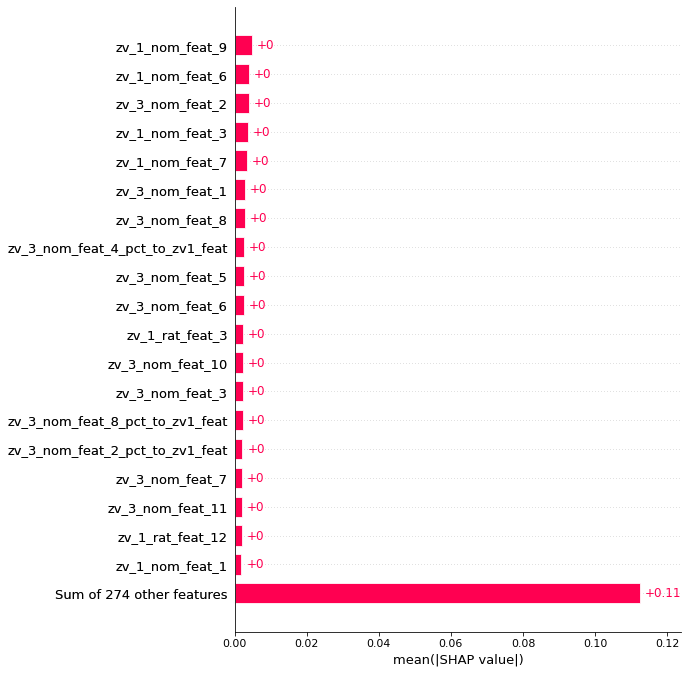

In [119]:
expl_transfer_random_forest.plot_global_bars(num_feat_shown=20)

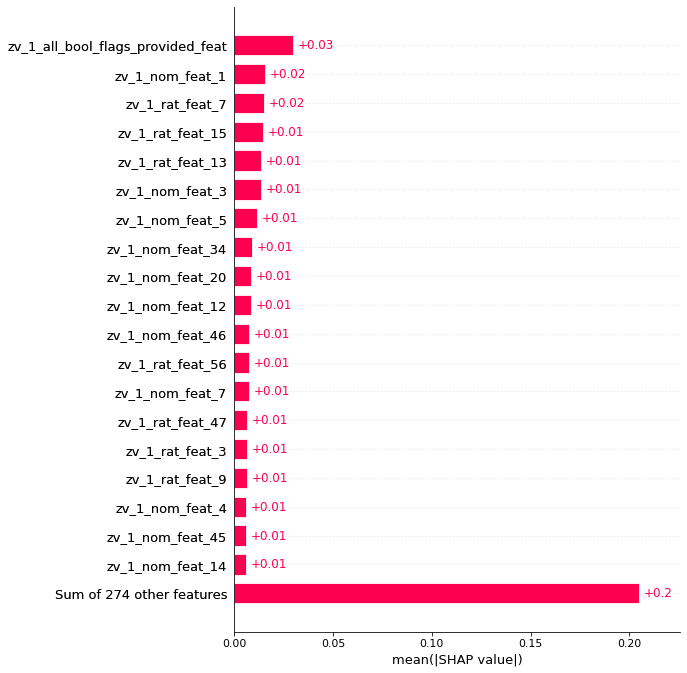

In [120]:
expl_transfer_xgb.plot_global_bars(num_feat_shown=20)

###### The global heatmap plot is computationally expensive and takes quite some time if the data set is big. Consider omitting it.

In [121]:
# expl.plot_global_heatmap(num_feat_shown=20)

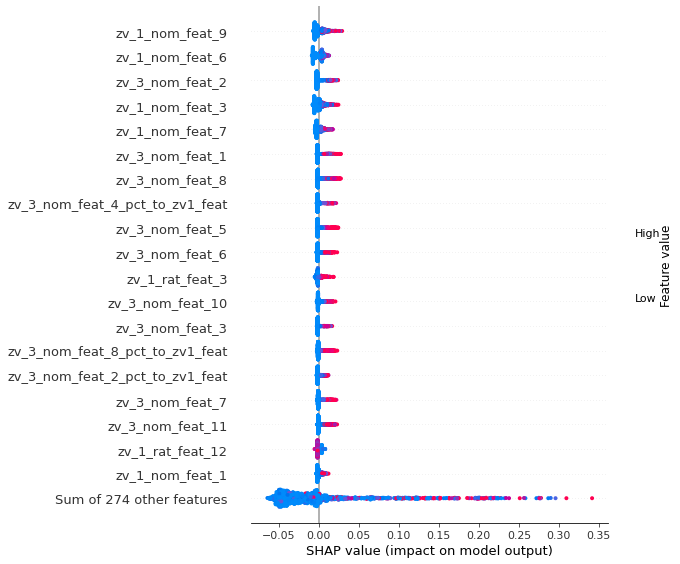

In [122]:
expl_transfer_random_forest.plot_global_beeswarm(num_feat_shown=20)

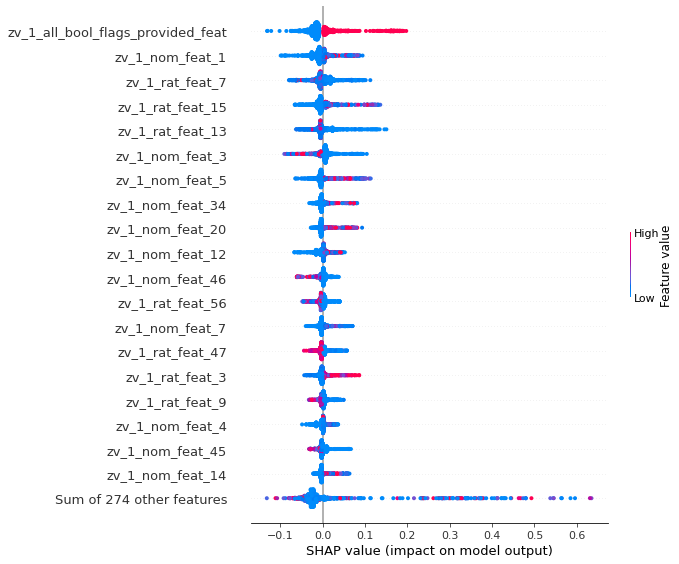

In [123]:
expl_transfer_xgb.plot_global_beeswarm(num_feat_shown=20)

###### Explanation data

In [124]:
# RandomForest
expl_transfer_random_forest.shap_explanation_data

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,1.960000e+05,3.857423e+05,2.254541e+04,3.641169e+05,2.185454e+05,7.498593e+05,1.760000e+05,3.740000e+05,0.000000e+00,1.700000e+05,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
3,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
5,6.735560e+06,8.252803e+06,7.196511e+06,8.288073e+06,1.393207e+07,1.654088e+07,5.529036e+06,2.151000e+06,1.975199e+06,4.550000e+06,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
6,2.081637e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.081637e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
7,1.693265e+06,1.251537e+06,1.727506e+06,1.218006e+06,3.420771e+06,2.469543e+06,1.450000e+05,0.000000e+00,4.390000e+05,2.280000e+05,...,0.0,0,0.008849,1,0.000000,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,0.000000e+00,0.000000e+00,8.869100e+02,3.632000e+02,8.869100e+02,3.632000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
1657,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
1658,1.940424e+07,2.781809e+07,1.952007e+07,2.622613e+07,3.892430e+07,5.404423e+07,1.486625e+07,2.454298e+07,1.384784e+07,2.316400e+07,...,0.0,0,0.000000,0,0.039382,1,0.0,0,0.0,0
1659,1.962219e+07,1.918395e+07,2.031671e+07,1.698979e+07,3.993890e+07,3.617375e+07,1.065093e+07,5.656374e+06,1.035670e+07,3.465213e+06,...,0.0,0,0.027830,1,0.000000,0,0.0,0,0.0,0


In [125]:
expl_transfer_xgb.shap_explanation_data

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
0,1.777454e+07,2.347394e+07,1.735086e+07,2.229028e+07,3.512540e+07,4.576422e+07,9.840000e+05,9.210000e+05,1.694000e+06,7.000000e+04,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0
2,1.819230e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.819230e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0
4,1.634227e+07,1.176609e+07,1.965253e+07,1.122773e+07,3.599479e+07,2.299381e+07,1.191600e+07,3.490000e+06,4.800000e+05,7.865000e+06,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0
6,3.482197e+05,3.674352e+05,3.278359e+05,3.752276e+05,6.760556e+05,7.426628e+05,2.250000e+05,3.000000e+05,0.000000e+00,0.000000e+00,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0
7,2.518784e+08,2.615562e+08,2.540845e+08,2.697241e+08,5.059629e+08,5.312803e+08,8.027500e+07,3.200900e+07,2.224000e+07,3.650800e+07,...,0.0,0,0.00000,0,0.019325,1,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,4.000000e+04,2.008619e+06,3.426546e+06,3.603810e+06,3.466546e+06,5.612428e+06,4.000000e+04,1.992000e+06,3.110000e+06,3.200000e+06,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0
1655,2.828530e+06,0.000000e+00,2.828530e+06,0.000000e+00,5.657059e+06,0.000000e+00,5.942065e+04,0.000000e+00,5.942065e+04,0.000000e+00,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0
1656,0.000000e+00,0.000000e+00,8.869100e+02,3.632000e+02,8.869100e+02,3.632000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0
1658,1.940424e+07,2.781809e+07,1.952007e+07,2.622613e+07,3.892430e+07,5.404423e+07,1.486625e+07,2.454298e+07,1.384784e+07,2.316400e+07,...,0.0,0,0.00000,0,0.039382,1,0.0,0,0.0,0


##### LOCAL (For individual data points / clients)

In [126]:
trans_key_list_1 = get_key_values_where_index_is_in_both_dataframes(df_one=trans_model_random_forest.X ,df_two=expl_transfer_random_forest.shap_explanation_data, key_in_df_one='orig_key_1')
tkv1 = trans_key_list_1[0]

trans_key_list_3 = get_key_values_where_index_is_in_both_dataframes(df_one=trans_model_xgb.X ,df_two=expl_transfer_xgb.shap_explanation_data, key_in_df_one='orig_key_1')
tkv3 = trans_key_list_3[0]

###### Individual feature contributions in a DataFrame:

In [127]:
expl_transfer_random_forest.get_local_shap_values_from_method(key_value=tkv1)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,-0.000713,-0.000884,-0.001504,0.00034,-0.000448,-0.000121,-0.000165,-0.001038,-0.00008,0.001569,...,0.0,0.0,-0.000058,0.000087,0.000126,0.0,0.0,0.0,0.0,0.0


In [128]:
expl_transfer_xgb.get_local_shap_values_from_method(key_value=tkv3)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
0,0.012987,0.0,0.005974,0.003576,0.002432,-0.000445,0.001926,0.0,-0.000612,0.000791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
expl_transfer_random_forest.get_local_shap_values_from_global(key_value=tkv1)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,-0.000713,-0.000884,-0.001504,0.00034,-0.000448,-0.000121,-0.000165,-0.001038,-0.00008,0.001569,...,0.0,0.0,-0.000058,0.000087,0.000126,0.0,0.0,0.0,0.0,0.0


In [130]:
expl_transfer_xgb.get_local_shap_values_from_global(key_value=tkv3)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
0,0.012987,0.0,0.005974,0.003576,0.002432,-0.000445,0.001926,0.0,-0.000612,0.000791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### As previously stated, there is an issue with the local shap values as there is a difference between local shap values coming from global and local shap values coming from the method. With the "compare_local_shap_from_global_with_local_shap_from_method()-method", the difference can be shown. The error should be corrected in newer versions of shap.

In [131]:
expl_transfer_random_forest.compare_local_shap_from_global_with_local_shap_from_method(key_value=tkv1)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,1
zv_1_nom_feat_2,0.039407


In [132]:
expl_transfer_xgb.compare_local_shap_from_global_with_local_shap_from_method(key_value=tkv3)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,0
zv_1_nom_feat_22,0.016377


##### F. PLOTS

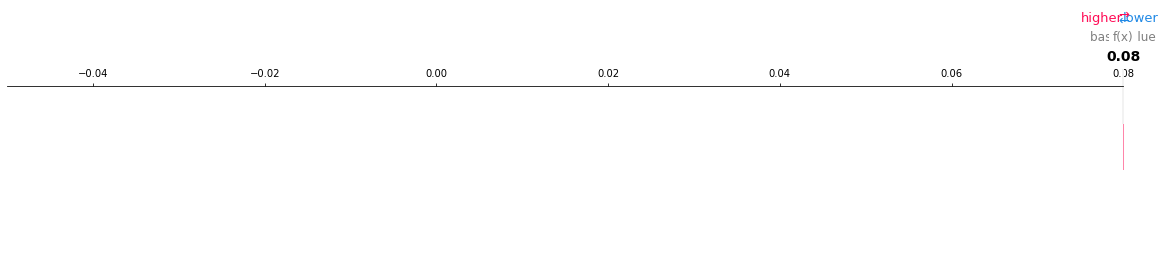

In [133]:
expl_transfer_random_forest.plot_local_force(key_value=tkv1)

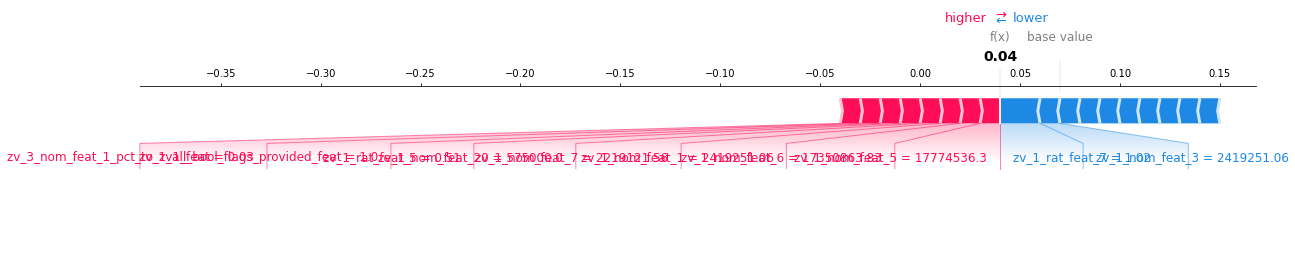

In [134]:
expl_transfer_xgb.plot_local_force(key_value=tkv3)

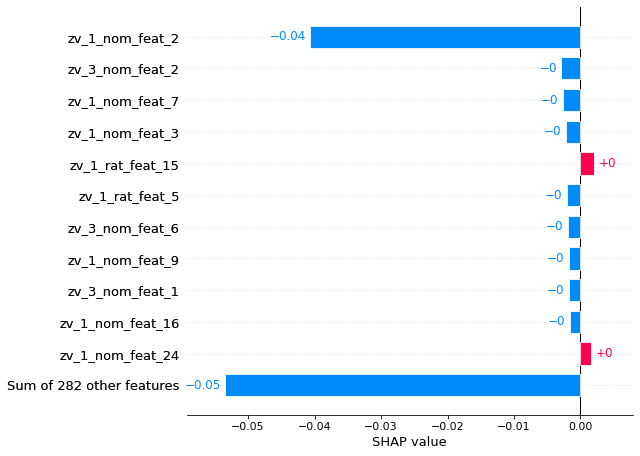

In [135]:
expl_transfer_random_forest.plot_local_bars_from_global(key_value=tkv1)

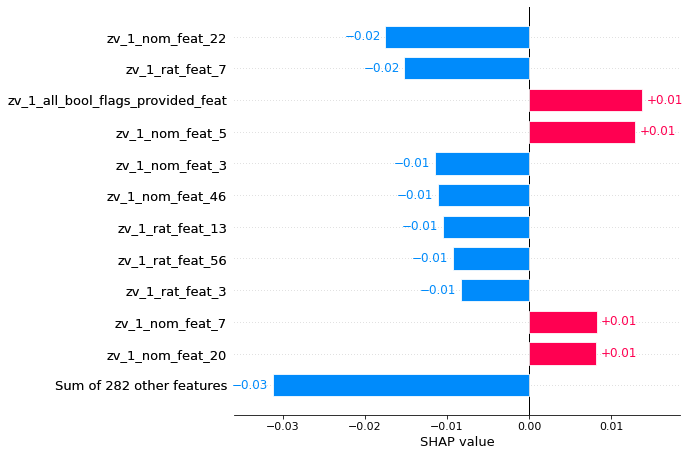

In [136]:
expl_transfer_xgb.plot_local_bars_from_global(key_value=tkv3)

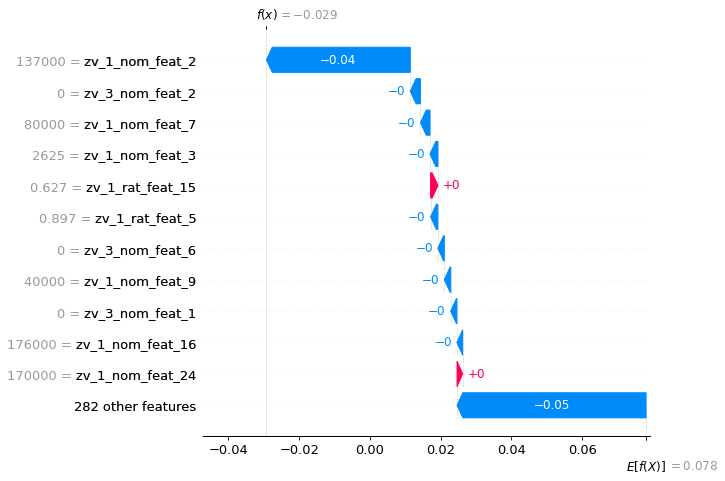

In [137]:
expl_transfer_random_forest.plot_local_waterfall_from_global(key_value=tkv1)

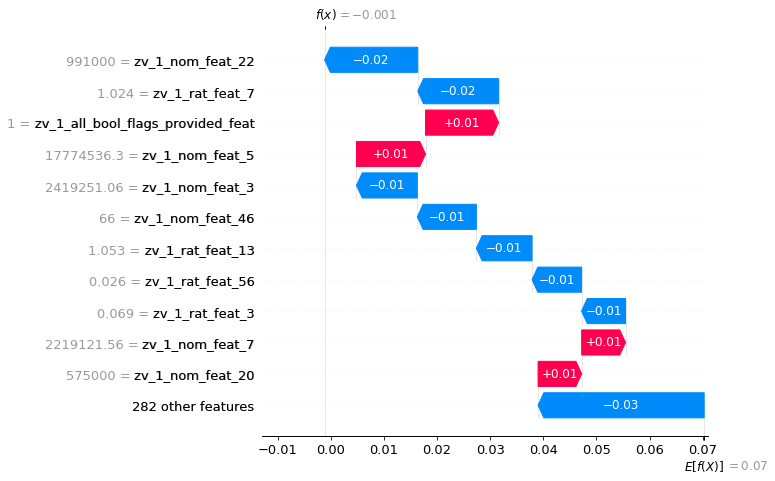

In [138]:
expl_transfer_xgb.plot_local_waterfall_from_global(key_value=tkv3)